# Tutorial 1 - Hairpin energies

We will begin exploring the Multistrand model by asking a simple question:  How do haipins fold?
Beginning from an unbound strand, and ending with a hairpin secondary structure, which scenario is more likely?

#### Scenario 1
The first base pairs form near the ends of the strands, and then *zip* towards the hairpin loop?


<img src="files/zip-outside-in.png" width="400px">


#### Scenario 2
The first base pairs form near the hairpin loop, and then *zip* towards the ends of the strands?

<img src="files/zip-inside-out.png" width="400px"/>

Let's find out the differences of these scenarios using `multistrand`.

We first need to import some objects and functions from the `multistrand` python library.

In [1]:
from multistrand.objects import *
from multistrand.options import Options
from multistrand.system import *

We begin by specifying the experimental conditions.  In this case, we will assume a temperature of $25^\circ $C.

In [2]:
TEMPERATURE=25
o = Options(temperature=TEMPERATURE,dangles="Some")
initialize_energy_model(o)

In [3]:
Loop_Energy = 0    # argument value to energy() function call, below, requesting no dG_assoc or dG_volume terms to be added.  So only loop energies remain.
Volume_Energy = 1  # argument value to energy() function call, below, requesting dG_volume but not dG_assoc terms to be added.  No clear interpretation for this.
Complex_Energy = 2 # argument value to energy() function call, below, requesting dG_assoc but not dG_volume terms to be added.  This is the NUPACK complex microstate energy.
Tube_Energy = 3    # argument value to energy() function call, below, requesting both dG_assoc and dG_volume terms to be added.  Summed over complexes, this is the system state energy.

Just for illustration, let's try to calculate the $\Delta G$ of a simple hairpin structure.

In [4]:
SEQUENCE = "GTTCGGGCAAAAGCCCGAAC"
STRUCTURE = '((((' + 12*'.' + '))))'
c = Complex( strands=[Strand(name="hairpin", sequence=SEQUENCE)], structure= STRUCTURE )
energy( [c], o, Complex_Energy)  # should be -1.1449...
# Note that energy() takes a *list* of complexes, and returns a tuple of energies.  Don't give it just a complex as input, else all hell may break loose.

(-1.449479284217312,)

## Sanity check the structure energy with `NUPACK`

Let's use the `NUPACK` python interface to ensure the energie values agree.

In [5]:
import nupack

MATERIAL = 'dna'
dna_seqs = [SEQUENCE]
print nupack.energy(dna_seqs, STRUCTURE, material = 'dna', T=TEMPERATURE)

Python interface to NUPACK 3.0 (Pierce lab, Caltech, www.nupack.org) loaded.
-1.44947928422


## Back to the experiment

Next we define a convenience function to pretty print secondary structures.

In [6]:
def print_hp(s):
    e = energy( [Complex( strands=[Strand(name="hairpin", sequence="GTTCGGGCAAAAGCCCGAAC")], structure=s)], o, Complex_Energy)[0]  
    print s + '  (%5.2f)' % e
    return e

#### Pathway for scenario 1
Recall that in scenario #1 the base pairs first form near the strand ends.

In [7]:
path1=[0]*9
path1[0] = print_hp('....................')
path1[1] = print_hp('(..................)')
path1[2] = print_hp('((................))')
path1[3] = print_hp('(((..............)))')
path1[4] = print_hp('((((............))))')
path1[5] = print_hp('(((((..........)))))')
path1[6] = print_hp('((((((........))))))')
path1[7] = print_hp('(((((((......)))))))')
path1[8] = print_hp('((((((((....))))))))')

....................  ( 0.00)
(..................)  ( 3.61)
((................))  ( 1.94)
(((..............)))  ( 0.25)
((((............))))  (-1.45)
(((((..........)))))  (-4.14)
((((((........))))))  (-6.22)
(((((((......)))))))  (-8.58)
((((((((....))))))))  (-10.37)


#### Pathway for scenario 2
In scenario #2 the first base pairs form near the loop and the stem forms by zipping towards the strand ends.

In [8]:
path2=[0]*9
for i in range(9):
    path2[i] = print_hp('.'*(8-i) + '('*i + '....' + ')'*i + '.'*(8-i))

steps    = range(9)

....................  ( 0.00)
.......(....).......  ( 2.24)
......((....))......  (-0.27)
.....(((....))).....  (-2.35)
....((((....))))....  (-3.95)
...(((((....)))))...  (-7.51)
..((((((....))))))..  (-7.50)
.(((((((....))))))).  (-7.78)
((((((((....))))))))  (-10.37)


## Plot the energy of the folding pathways
Note that both pathways lead to the same structure, which has the same free energy.  But how does the energy change while the stem is forming, and how are the two scenarios different?  We can plot the energy at each step of these two possible folding pathways, as they progress from an unfolded state to a completely folded state, to see how they differ.  Plotting is simple with the help of the `matplotlib` and `numpy` libraries.

In [9]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pylab as pyp

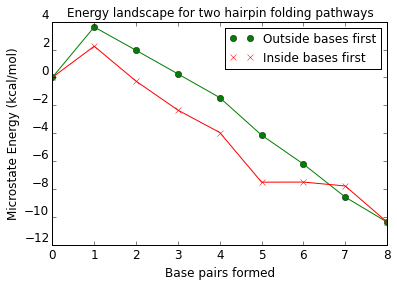

In [10]:
pyp.figure(1)
pyp.plot(steps,path1,'go', label='Outside bases first')
pyp.hold(True)
pyp.plot(steps,path1,'g-', label='_nolabel_')
pyp.plot(steps,path2,'rx', label='Inside bases first')
pyp.plot(steps,path2,'r-', label='_nolabel_')
pyp.hold(False)
pyp.title("Energy landscape for two hairpin folding pathways")
pyp.xlabel("Base pairs formed",fontsize='larger')
pyp.ylabel("Microstate Energy (kcal/mol)",fontsize='larger')
pyp.yticks(fontsize='larger',va='bottom')
pyp.xticks(fontsize='larger')
pyp.legend()
pyp.show()